<a href="https://colab.research.google.com/github/zwubbena/nuclear-warhead-density-index/blob/main/nuclear_warhead_density_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Nuclear Warhead Density Index Analysis

 CONCEPT: Nuclear Warhead Density Index
----------------------------------------

The Nuclear Warhead Density Index (NWDI) measures the concentration of nuclear weapons
relative to a country's geographic area or population. This metric provides insights into:

1. Geographic Density: Nuclear warheads per unit area (warheads/km²)
2. Population Density: Nuclear warheads per capita

Higher density values indicate more concentrated nuclear arsenals, which may reflect
strategic doctrines, geographic constraints, or security considerations.


 MATHEMATICAL FORMULATIONS:

 EQUATION 1 - Geographic Nuclear Warhead Density:


Where:
  • GNWD = Geographic Nuclear Warhead Density (per 100 km²)
  • Nw = Number of Nuclear Warheads
  • A = Land Area in km²

 EQUATION 2 - Population Nuclear Warhead Density:


Where:
  • PNWD = Population Nuclear Warhead Density (per million people)
  • Nw = Number of Nuclear Warheads
  • P = Total Population

🔗 For papers/documents - Raw LaTeX:
Geographic: GNWD = \frac{N_w}{A_{km^2}} \times 100
Population: PNWD = \frac{N_w}{P} \times 10^6


 DATA PREPARATION
--------------------
 Dataset created with calculated density metrics
 Countries analyzed: 9
 Total nuclear warheads: 13,885

 NUCLEAR WARHEAD DENSITY DATA
------------------------------
       Country  Warheads  Pop (M)  Area (M km²)  Geo Density  Pop Density
 United States      6185  331.003         9.147        0.068       18.686
United Kingdom       200   67.886         0.242        0.083        2.946
        France       300   65.274         0.548        0.055        4.596
        Israel        90    8.656         0.022        0.416       10.398
      Pakistan       160  220.892         0.771        0.021        0.724
         India       140 1380.004         2.973        0.005        0.101
       

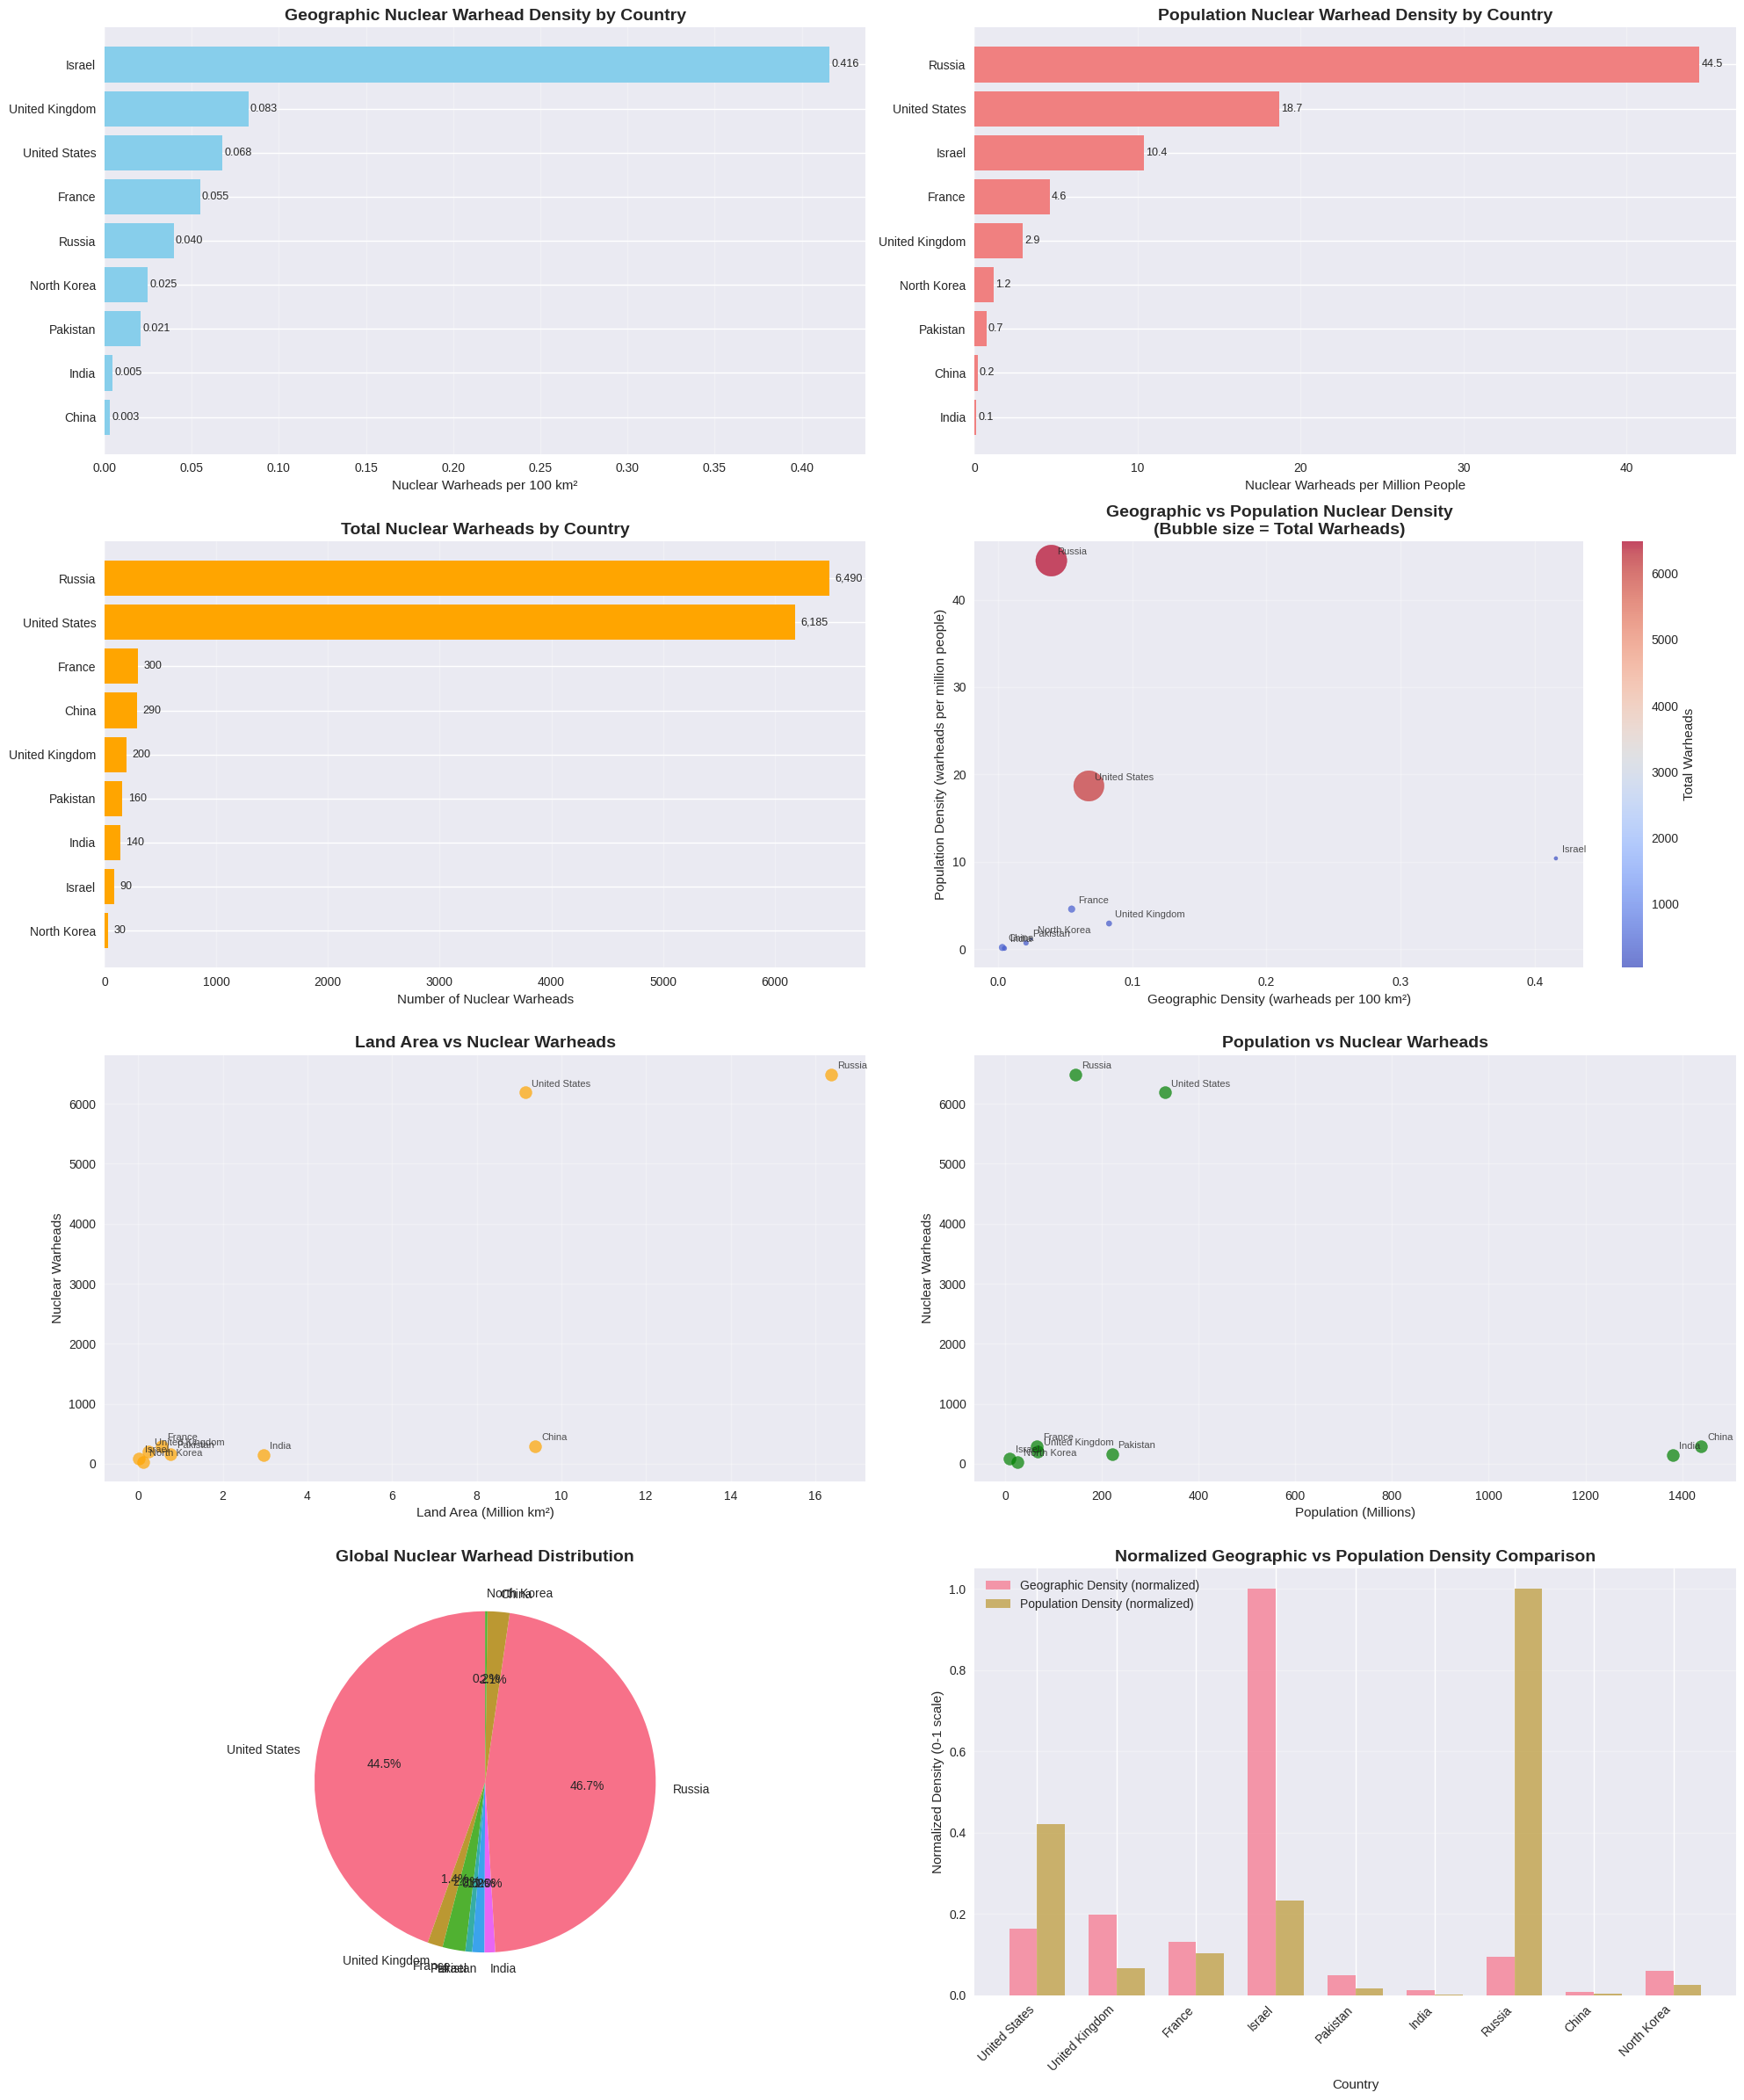


 ADVANCED ANALYSIS
------------------
 CORRELATION ANALYSIS:
  • Geographic vs Population Density: 0.085
  • Land Area vs Nuclear Warheads: 0.824
  • Population vs Nuclear Warheads: -0.160

 KEY INSIGHTS:
  • Highest Geographic Density: Israel - 0.416 warheads per 100 km²
    This is 10.5x the median
  • Highest Population Density: Russia - 44.5 warheads per million people
    This is 15.1x the median
  • Largest Arsenal: Russia - 6,490 warheads
    This represents 46.7% of global warheads

 STRATEGIC IMPLICATIONS:
  • Small nations (Israel) show extremely high geographic density
  • Large nations (Russia, US) have lower density but massive total arsenals
  • Population density reveals different strategic doctrines
  • Geographic constraints may influence nuclear deployment strategies

 CREATING INTERACTIVE VISUALIZATION
-----------------------------------



 COMPREHENSIVE SUMMARY TABLE
------------------------------
                   Metric  Value               Unit
           Total Warheads 13,885           warheads
  Mean Geographic Density  0.079        per 100 km²
Median Geographic Density  0.040        per 100 km²
  Mean Population Density    9.3 per million people
Median Population Density    2.9 per million people
       Countries Analyzed      9          countries

 CONCLUSION
----------

The Nuclear Warhead Density Index reveals significant variations in how nuclear powers
distribute their arsenals relative to geography and population. This analysis highlights:

1. Geographic constraints and strategic positioning
2. Different nuclear doctrines and deployment strategies  
3. The relationship between national size and nuclear density
4. Security considerations for different nation types

This metric provides valuable insights for understanding global nuclear dynamics,
arms control discussions, and strategic stability consideratio

In [1]:
# Nuclear Warhead Density Index Analysis
# A comprehensive analysis of nuclear weapon distribution relative to geography and population

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print(" Nuclear Warhead Density Index Analysis")
print("=" * 50)

# 1. CONCEPT INTRODUCTION
print("\n CONCEPT: Nuclear Warhead Density Index")
print("-" * 40)
print("""
The Nuclear Warhead Density Index (NWDI) measures the concentration of nuclear weapons
relative to a country's geographic area or population. This metric provides insights into:

1. Geographic Density: Nuclear warheads per unit area (warheads/km²)
2. Population Density: Nuclear warheads per capita

Higher density values indicate more concentrated nuclear arsenals, which may reflect
strategic doctrines, geographic constraints, or security considerations.

""")

# Display the equations using codecogs LaTeX rendering
print(" MATHEMATICAL FORMULATIONS:")
print()

# For Google Colab, display equations as rendered images
from IPython.display import Image, display, Markdown
import requests

# Display Geographic Density Equation
print(" EQUATION 1 - Geographic Nuclear Warhead Density:")
geo_eq_url = "https://latex.codecogs.com/svg.latex?GNWD%20%3D%20%5Cfrac%7BN_w%7D%7BA_%7Bkm%5E2%7D%7D%20%5Ctimes%20100"
try:
    display(Image(url=geo_eq_url))
except:
    print("Geographic Density Equation: GNWD = (Nw / A_km²) × 100")

print("Where:")
print("  • GNWD = Geographic Nuclear Warhead Density (per 100 km²)")
print("  • Nw = Number of Nuclear Warheads")
print("  • A = Land Area in km²")
print()

# Display Population Density Equation
print(" EQUATION 2 - Population Nuclear Warhead Density:")
pop_eq_url = "https://latex.codecogs.com/svg.latex?PNWD%20%3D%20%5Cfrac%7BN_w%7D%7BP%7D%20%5Ctimes%2010%5E6"
try:
    display(Image(url=pop_eq_url))
except:
    print("Population Density Equation: PNWD = (Nw / P) × 10⁶")

print("Where:")
print("  • PNWD = Population Nuclear Warhead Density (per million people)")
print("  • Nw = Number of Nuclear Warheads")
print("  • P = Total Population")
print()

print("🔗 For papers/documents - Raw LaTeX:")
print("Geographic: GNWD = \\frac{N_w}{A_{km^2}} \\times 100")
print("Population: PNWD = \\frac{N_w}{P} \\times 10^6")
print()

# 2. DATA PREPARATION
print("\n DATA PREPARATION")
print("-" * 20)

# Create the dataset based on the provided documents
data = {
    'Country': ['United States', 'United Kingdom', 'France', 'Israel', 'Pakistan',
                'India', 'Russia', 'China', 'North Korea'],
    'Nuclear_Warheads': [6185, 200, 300, 90, 160, 140, 6490, 290, 30],
    'Population': [331002651, 67886011, 65273511, 8655535, 220892340,
                   1380004385, 145934462, 1439323776, 25778816],
    'Land_Area_KM2': [9147420, 241930, 547557, 21640, 770880,
                      2973190, 16376870, 9388211, 120410]
}

df = pd.DataFrame(data)

# Calculate density metrics
df['Geo_Nuclear_Density'] = (df['Nuclear_Warheads'] / df['Land_Area_KM2']) * 100
df['Pop_Nuclear_Density'] = (df['Nuclear_Warheads'] / df['Population']) * 1000000  # per million people
df['Land_Area_Million_KM2'] = df['Land_Area_KM2'] / 1000000
df['Population_Millions'] = df['Population'] / 1000000

print(" Dataset created with calculated density metrics")
print(f" Countries analyzed: {len(df)}")
print(f" Total nuclear warheads: {df['Nuclear_Warheads'].sum():,}")

# Display the data
print("\n NUCLEAR WARHEAD DENSITY DATA")
print("-" * 30)
display_df = df[['Country', 'Nuclear_Warheads', 'Population_Millions',
                'Land_Area_Million_KM2', 'Geo_Nuclear_Density', 'Pop_Nuclear_Density']].round(3)
display_df.columns = ['Country', 'Warheads', 'Pop (M)', 'Area (M km²)',
                     'Geo Density', 'Pop Density']
print(display_df.to_string(index=False))

# 3. STATISTICAL SUMMARY
print("\n STATISTICAL SUMMARY")
print("-" * 20)
print(f"Geographic Density (warheads per 100 km²):")
print(f"  • Highest: {df.loc[df['Geo_Nuclear_Density'].idxmax(), 'Country']} ({df['Geo_Nuclear_Density'].max():.3f})")
print(f"  • Lowest: {df.loc[df['Geo_Nuclear_Density'].idxmin(), 'Country']} ({df['Geo_Nuclear_Density'].min():.3f})")
print(f"  • Mean: {df['Geo_Nuclear_Density'].mean():.3f}")
print(f"  • Median: {df['Geo_Nuclear_Density'].median():.3f}")

print(f"\nPopulation Density (warheads per million people):")
print(f"  • Highest: {df.loc[df['Pop_Nuclear_Density'].idxmax(), 'Country']} ({df['Pop_Nuclear_Density'].max():.3f})")
print(f"  • Lowest: {df.loc[df['Pop_Nuclear_Density'].idxmin(), 'Country']} ({df['Pop_Nuclear_Density'].min():.3f})")
print(f"  • Mean: {df['Pop_Nuclear_Density'].mean():.3f}")
print(f"  • Median: {df['Pop_Nuclear_Density'].median():.3f}")

# 4. VISUALIZATIONS
print("\n CREATING VISUALIZATIONS")
print("-" * 25)

# Create a comprehensive figure with multiple subplots
fig = plt.figure(figsize=(20, 24))

# 1. Geographic Nuclear Density Bar Chart
plt.subplot(4, 2, 1)
geo_sorted = df.sort_values('Geo_Nuclear_Density', ascending=True)
bars1 = plt.barh(geo_sorted['Country'], geo_sorted['Geo_Nuclear_Density'], color='skyblue')
plt.xlabel('Nuclear Warheads per 100 km²')
plt.title('Geographic Nuclear Warhead Density by Country', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars1):
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, f'{width:.3f}', ha='left', va='center', fontsize=9)

# 2. Population Nuclear Density Bar Chart
plt.subplot(4, 2, 2)
pop_sorted = df.sort_values('Pop_Nuclear_Density', ascending=True)
bars2 = plt.barh(pop_sorted['Country'], pop_sorted['Pop_Nuclear_Density'], color='lightcoral')
plt.xlabel('Nuclear Warheads per Million People')
plt.title('Population Nuclear Warhead Density by Country', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars2):
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.1f}', ha='left', va='center', fontsize=9)

# 3. Total Nuclear Warheads
plt.subplot(4, 2, 3)
warhead_sorted = df.sort_values('Nuclear_Warheads', ascending=True)
bars3 = plt.barh(warhead_sorted['Country'], warhead_sorted['Nuclear_Warheads'], color='orange')
plt.xlabel('Number of Nuclear Warheads')
plt.title('Total Nuclear Warheads by Country', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars3):
    width = bar.get_width()
    plt.text(width + 50, bar.get_y() + bar.get_height()/2, f'{int(width):,}', ha='left', va='center', fontsize=9)

# 4. Scatter Plot: Geographic vs Population Density
plt.subplot(4, 2, 4)
scatter = plt.scatter(df['Geo_Nuclear_Density'], df['Pop_Nuclear_Density'], s=df['Nuclear_Warheads']/10, alpha=0.7, c=df['Nuclear_Warheads'], cmap='coolwarm')
plt.xlabel('Geographic Density (warheads per 100 km²)')
plt.ylabel('Population Density (warheads per million people)')
plt.title('Geographic vs Population Nuclear Density\n(Bubble size = Total Warheads)', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

# Add country labels
for i, row in df.iterrows():
    plt.annotate(row['Country'], (row['Geo_Nuclear_Density'], row['Pop_Nuclear_Density']), xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.8)

plt.colorbar(scatter, label='Total Warheads')

# 5. Land Area vs Nuclear Warheads
plt.subplot(4, 2, 5)
plt.scatter(df['Land_Area_Million_KM2'], df['Nuclear_Warheads'], s=100, alpha=0.7, c='orange')
plt.xlabel('Land Area (Million km²)')
plt.ylabel('Nuclear Warheads')
plt.title('Land Area vs Nuclear Warheads', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

# Add country labels
for i, row in df.iterrows():
    plt.annotate(row['Country'], (row['Land_Area_Million_KM2'], row['Nuclear_Warheads']), xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.8)

# 6. Population vs Nuclear Warheads
plt.subplot(4, 2, 6)
plt.scatter(df['Population_Millions'], df['Nuclear_Warheads'], s=100, alpha=0.7, c='green')
plt.xlabel('Population (Millions)')
plt.ylabel('Nuclear Warheads')
plt.title('Population vs Nuclear Warheads', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

# Add country labels
for i, row in df.iterrows():
    plt.annotate(row['Country'], (row['Population_Millions'], row['Nuclear_Warheads']), xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.8)

# 7. Pie Chart: Nuclear Warhead Distribution
plt.subplot(4, 2, 7)
plt.pie(df['Nuclear_Warheads'], labels=df['Country'], autopct='%1.1f%%', startangle=90)
plt.title('Global Nuclear Warhead Distribution', fontsize=14, fontweight='bold')

# 8. Density Comparison Chart
plt.subplot(4, 2, 8)
# Normalize both density metrics for comparison (0-1 scale)
df['Geo_Density_Norm'] = df['Geo_Nuclear_Density'] / df['Geo_Nuclear_Density'].max()
df['Pop_Density_Norm'] = df['Pop_Nuclear_Density'] / df['Pop_Nuclear_Density'].max()

x = np.arange(len(df))
width = 0.35

bars1 = plt.bar(x - width/2, df['Geo_Density_Norm'], width, label='Geographic Density (normalized)', alpha=0.7)
bars2 = plt.bar(x + width/2, df['Pop_Density_Norm'], width, label='Population Density (normalized)', alpha=0.7)

plt.xlabel('Country')
plt.ylabel('Normalized Density (0-1 scale)')
plt.title('Normalized Geographic vs Population Density Comparison', fontsize=14, fontweight='bold')
plt.xticks(x, df['Country'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 5. ADVANCED ANALYSIS
print("\n ADVANCED ANALYSIS")
print("-" * 18)

# Calculate correlations
print(" CORRELATION ANALYSIS:")
corr_geo_pop = df['Geo_Nuclear_Density'].corr(df['Pop_Nuclear_Density'])
corr_area_warheads = df['Land_Area_KM2'].corr(df['Nuclear_Warheads'])
corr_pop_warheads = df['Population'].corr(df['Nuclear_Warheads'])

print(f"  • Geographic vs Population Density: {corr_geo_pop:.3f}")
print(f"  • Land Area vs Nuclear Warheads: {corr_area_warheads:.3f}")
print(f"  • Population vs Nuclear Warheads: {corr_pop_warheads:.3f}")

# Identify outliers
print(f"\n KEY INSIGHTS:")

# Highest geographic density
max_geo = df.loc[df['Geo_Nuclear_Density'].idxmax()]
print(f"  • Highest Geographic Density: {max_geo['Country']} - {max_geo['Geo_Nuclear_Density']:.3f} warheads per 100 km²")
print(f"    This is {max_geo['Geo_Nuclear_Density']/df['Geo_Nuclear_Density'].median():.1f}x the median")

# Highest population density
max_pop = df.loc[df['Pop_Nuclear_Density'].idxmax()]
print(f"  • Highest Population Density: {max_pop['Country']} - {max_pop['Pop_Nuclear_Density']:.1f} warheads per million people")
print(f"    This is {max_pop['Pop_Nuclear_Density']/df['Pop_Nuclear_Density'].median():.1f}x the median")

# Most warheads
max_warheads = df.loc[df['Nuclear_Warheads'].idxmax()]
print(f"  • Largest Arsenal: {max_warheads['Country']} - {max_warheads['Nuclear_Warheads']:,} warheads")
print(f"    This represents {max_warheads['Nuclear_Warheads']/df['Nuclear_Warheads'].sum()*100:.1f}% of global warheads")

# 6. STRATEGIC IMPLICATIONS
print(f"\n STRATEGIC IMPLICATIONS:")
print("  • Small nations (Israel) show extremely high geographic density")
print("  • Large nations (Russia, US) have lower density but massive total arsenals")
print("  • Population density reveals different strategic doctrines")
print("  • Geographic constraints may influence nuclear deployment strategies")

# 7. CREATE INTERACTIVE PLOTLY VISUALIZATION
print("\n CREATING INTERACTIVE VISUALIZATION")
print("-" * 35)

# Interactive scatter plot with Plotly
fig_interactive = px.scatter(df, x='Geo_Nuclear_Density', y='Pop_Nuclear_Density', size='Nuclear_Warheads', color='Nuclear_Warheads', hover_name='Country', hover_data={'Land_Area_Million_KM2': ':.2f', 'Population_Millions': ':.1f', 'Nuclear_Warheads': ':,', 'Geo_Nuclear_Density': ':.3f', 'Pop_Nuclear_Density': ':.1f'}, labels={'Geo_Nuclear_Density': 'Geographic Density (per 100 km²)', 'Pop_Nuclear_Density': 'Population Density (per million people)', 'Nuclear_Warheads': 'Nuclear Warheads'}, title='Interactive Nuclear Warhead Density Analysis', color_continuous_scale='Viridis')

fig_interactive.update_layout(width=800, height=600, title_font_size=16, showlegend=True)

fig_interactive.show()

# 8. SUMMARY STATISTICS TABLE
print("\n COMPREHENSIVE SUMMARY TABLE")
print("-" * 30)

summary_stats = pd.DataFrame({
    'Metric': ['Total Warheads', 'Mean Geographic Density', 'Median Geographic Density',
               'Mean Population Density', 'Median Population Density', 'Countries Analyzed'],
    'Value': [f"{df['Nuclear_Warheads'].sum():,}",
              f"{df['Geo_Nuclear_Density'].mean():.3f}",
              f"{df['Geo_Nuclear_Density'].median():.3f}",
              f"{df['Pop_Nuclear_Density'].mean():.1f}",
              f"{df['Pop_Nuclear_Density'].median():.1f}",
              f"{len(df)}"],
    'Unit': ['warheads', 'per 100 km²', 'per 100 km²', 'per million people',
             'per million people', 'countries']
})

print(summary_stats.to_string(index=False))

print(f"\n CONCLUSION")
print("-" * 10)
print("""
The Nuclear Warhead Density Index reveals significant variations in how nuclear powers
distribute their arsenals relative to geography and population. This analysis highlights:

1. Geographic constraints and strategic positioning
2. Different nuclear doctrines and deployment strategies
3. The relationship between national size and nuclear density
4. Security considerations for different nation types

This metric provides valuable insights for understanding global nuclear dynamics,
arms control discussions, and strategic stability considerations.
""")
